# Ishaan Solanki

## Main Research question

> **Who are the top 4 IPL Batsmen of all time?**

## Sub-Research question 1

> **Who is best chaser in the IPL?**

## Sub-Research question 2 

> **Who is best death batsman?**

**In order to achieve this, I will analyze their performance  across their entire careers, taking into account the statistics provided by our data sources for both regular season and playoffs, giving more importance in the latter.**

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from codes import project_function1 as pf1
import random

In [188]:
ball_by_ball = pd.read_csv("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [189]:
matches = pd.read_csv("../data/raw/IPL_Matches_2008_2022 (1).csv")
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


## **EXPLORATORY DATA ANALYSIS**

### **I. Creating a dataframe that contains Batsmen stats**

In [190]:
#Proccesing the new dataframe
batsman_stats = pf1.get_batsman_stats(ball_by_ball)

#Filtering out batsmen
batsman_stats = batsman_stats[batsman_stats['Total Runs'] >= 1000]

#Making new variables that will help in analysis
batsman_stats['Strike Rate'] = batsman_stats['Total Runs'] / batsman_stats['Balls Faced'] * 100
batsman_stats['Runs scored per wicket']= batsman_stats['Total Runs'] / batsman_stats['Wickets'] 

#Sorting by value
batsman_stats = batsman_stats.sort_values('Runs scored per wicket',ascending=False)
batsman_stats.head(10)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
KL Rahul,99,3895,2933,84,132.799182,46.369048
AB de Villiers,170,5181,3487,125,148.580442,41.448000
JP Duminy,75,2029,1680,49,120.773810,41.408163
DA Warner,162,5883,4313,143,136.401577,41.139860
LMP Simmons,29,1079,878,27,122.892938,39.962963
JC Buttler,81,2832,1955,71,144.859335,39.887324
ML Hayden,32,1107,839,28,131.942789,39.535714
CH Gayle,141,4997,3516,128,142.121729,39.039062
SE Marsh,69,2489,1913,65,130.109775,38.292308


**We have a new data frame that gives us the aggregate statistics of Batsmen and will be used to perform analysis**

### **II. Creating Visualization**

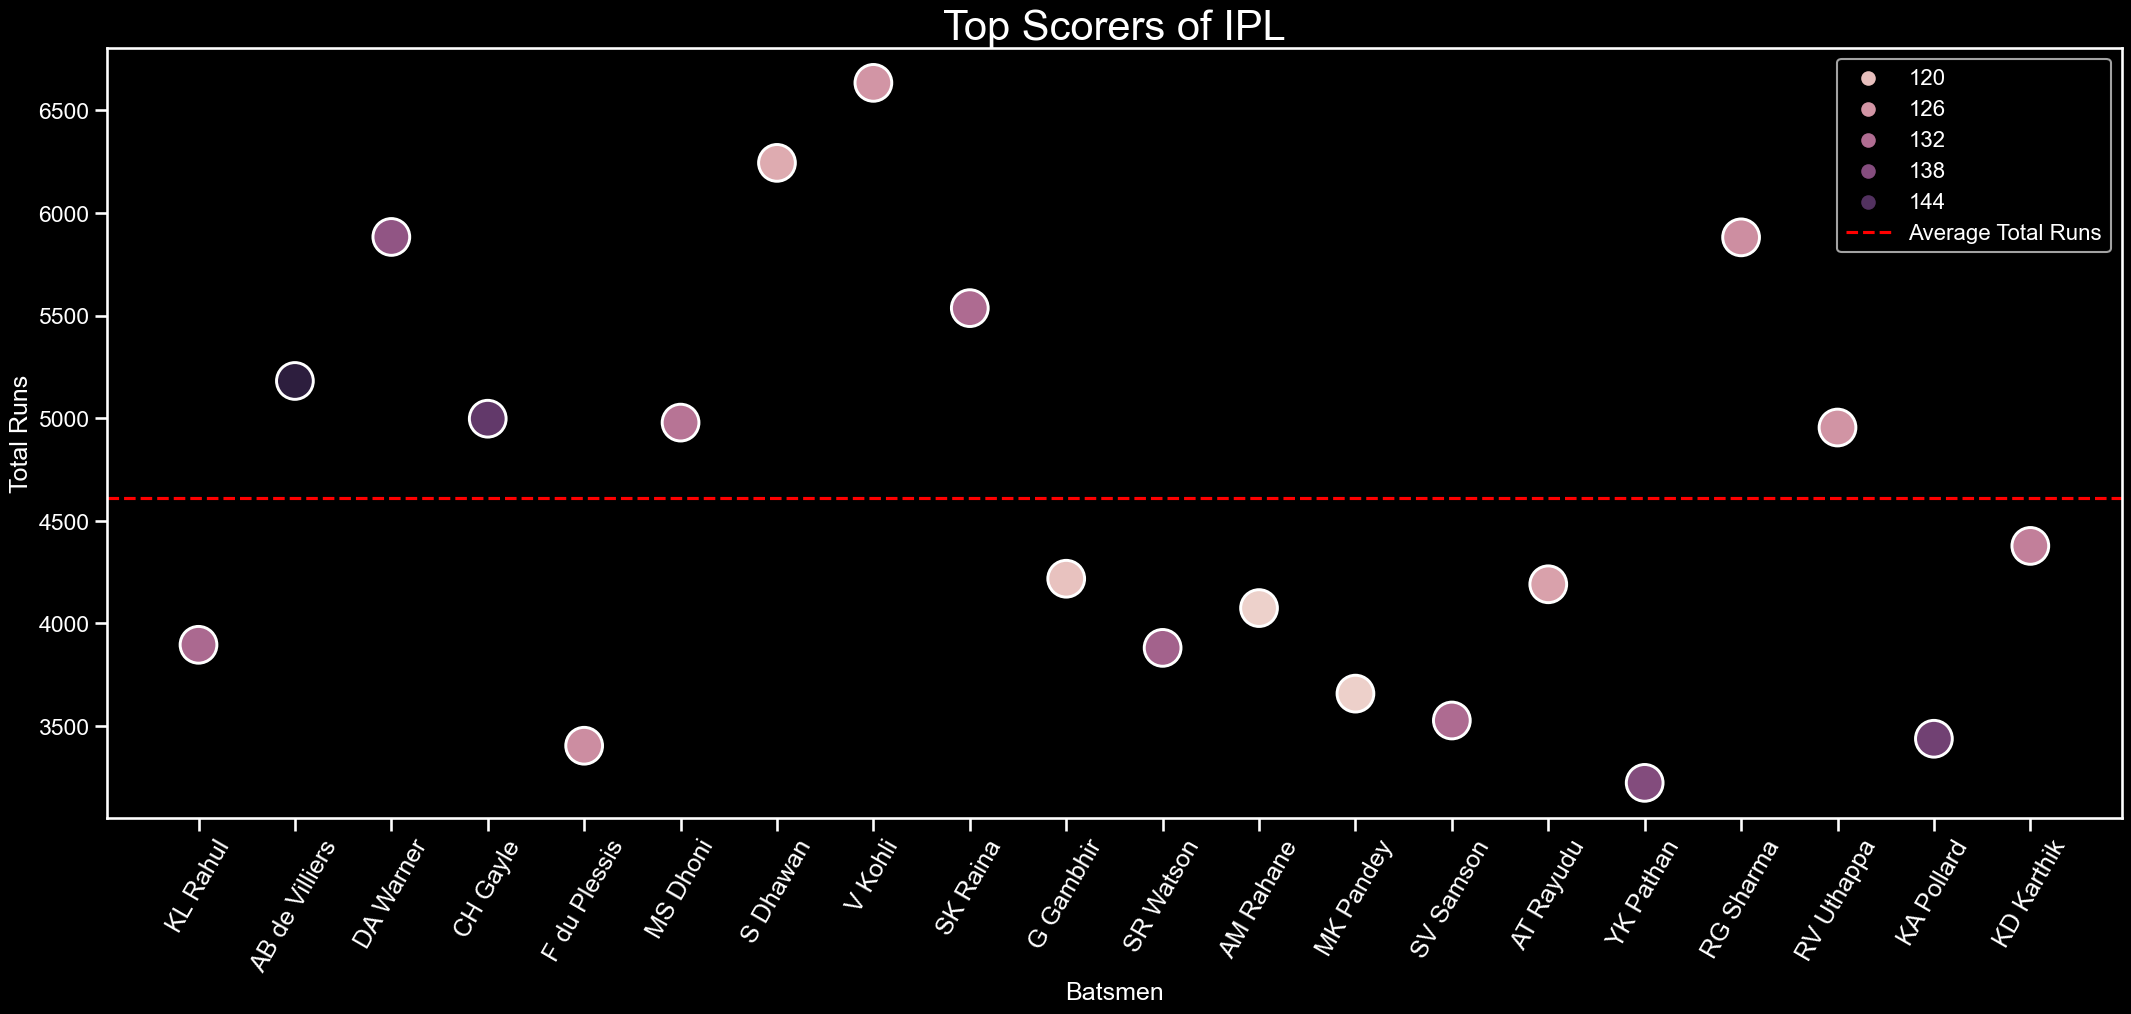

In [191]:
# Filtering out for top batsmen
filtered_data = batsman_stats[batsman_stats['Total Runs'] >= 3000]

# Calculating average total runs
avg_total_runs = filtered_data['Total Runs'].mean()

# Creating plot
sns.scatterplot(x=filtered_data.index, y=filtered_data['Total Runs'], hue=filtered_data['Strike Rate'], s=700)
plt.axhline(avg_total_runs, color='red', linestyle='--', label='Average Total Runs')
plt.legend(fontsize=16)
fig = plt.gcf() 
fig.set_size_inches(26, 10)
plt.xticks(rotation=60, fontsize=18)
plt.xlabel('Batsmen', fontsize=18)
plt.ylabel('Total Runs', fontsize=18)
plt.title('Top Scorers of IPL', fontsize=30)
plt.show()

**This shows us who has scored the most runs in IPL and their strike rate.**
* Virat Kohli is the top scorer of the IPL
* People with less strike generally have low runs, this could indicate that the risk of getting out increases with high strike rate.
* AB de Villiers and Chris Gayle are one of the few people with high strike rate and have scored 4000k+ runs.

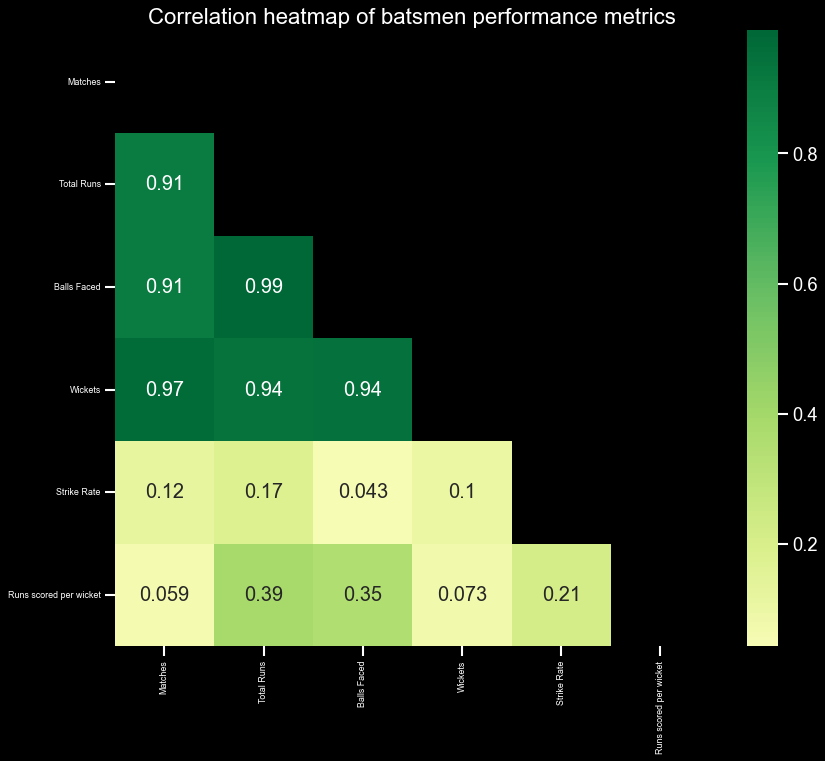

In [192]:
#Creating plot
plt.figure(figsize=(12,10), dpi= 80)
mask = np.triu(np.ones_like(batsman_stats.corr(), dtype=bool))

sns.heatmap(batsman_stats.corr(), xticklabels=batsman_stats.corr().columns, yticklabels=batsman_stats.corr().columns, cmap='RdYlGn', center=0, annot=True, mask = mask)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation heatmap of batsmen performance metrics', fontsize=20)
plt.show()

**This gives us an overview of what variables are directly propotional to each other and which don't have any correlation. This will help us evaluate the data more precisely.**
* Matches and Runs scored per wicket have no correlation. This means that batsmen who have scored 1000 runs don't get better as they play more matches. 
* Strike rate and Total Runs have a weak correlation hence having a high strike rate and scoring a lot of runs is impressive.
* Matches and wickets have a very high correlation this shows that staying not out after facing many deliviers is a big accomplishment.


### **III. Creating a second dataframe that contains batsmne stats while chasing.**

In [193]:
#Proccesing the new dataframe
batsman_stats1 = pf1.get_chasing_stats(ball_by_ball)

#Filtering out batsmen
batsman_stats1 = batsman_stats1[batsman_stats1['Total Runs'] >= 1000]

#Making new variables that will help in analysis
batsman_stats1['Strike Rate'] = batsman_stats1['Total Runs'] / batsman_stats1['Balls Faced'] * 100
batsman_stats1['Runs scored per wicket']= batsman_stats1['Total Runs'] / batsman_stats1['Wickets'] 

#Sorting by value
batsman_stats1 = batsman_stats1.sort_values('Runs scored per wicket',ascending=False)
batsman_stats1.head(10)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
KL Rahul,45,1961,1461,40,134.223135,49.025000
DA Miller,50,1444,1060,32,136.226415,45.125000
Shubman Gill,34,1012,822,24,123.114355,42.166667
DA Warner,83,2841,2057,69,138.113758,41.173913
JC Buttler,43,1437,924,36,155.519481,39.916667
S Dhawan,88,2707,2200,68,123.045455,39.808824
CH Gayle,66,2124,1557,55,136.416185,38.618182
SE Marsh,29,1072,793,28,135.182850,38.285714
KS Williamson,39,1080,928,29,116.379310,37.241379


### **IV. Creating Visualization**

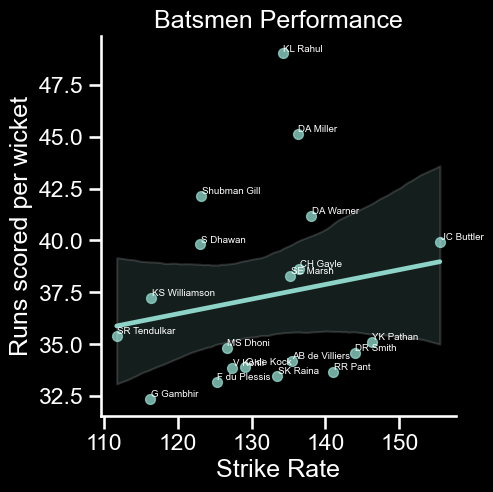

In [194]:
#Setting theme
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

# Filtering out for top batsmen
filtered_data = batsman_stats1[batsman_stats1['Runs scored per wicket'] >= 32]


# Creating scatter plot with trendline and 95% CI
sns.lmplot(x='Strike Rate', y='Runs scored per wicket', data=filtered_data, scatter_kws={'s': 50})
plt.xlabel('Strike Rate')
plt.ylabel('Runs scored per wicket')
plt.title('Batsmen Performance')

#Point labels
offset = 0.1
for i, row in filtered_data.iterrows():
    plt.text(row['Strike Rate'] + offset, row['Runs scored per wicket'] + offset, row.name, fontsize=7)


# Displaying chart
plt.show()


**Observations:**
* Runs scored per wicket increases with higher strike rate, which is a bit flawed. Since KL Rahul, DA Miller and DA warner are exceptionally good at chasing that they have manipulated the trendline. The population belows the trend line is good evidence of that.
* Because of this manipulation, we can't fully appreciate JC Buttler's insane stats which makes him argubaly as good as DA Warner even though he has more Runs scored per wicket. Buttler's strike rate is best and yet he has one of the highest runs scored per wicket.
* KL Rahul and DA Miller are best batsmen while chasing and it's not close.

## **DATA ANALYSIS PIPELINE**

#### **I. LOAD DATA**

In [195]:
#Loading data
matches = pf1.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")
ball_by_ball = pf1.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")

#Exporting processed data
export_path = '../data/processed/Ishaan/batsman_stats.csv'
batsman_stats.to_csv(export_path, index=True)
export_path = '../data/processed/Ishaan/batsman_stats1.csv'
batsman_stats1.to_csv(export_path, index=True)



#### **II. CLEANING DATA**

In [196]:
print(matches.columns.tolist())
print(ball_by_ball.columns.tolist())

['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']
['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind', 'fielders_involved', 'BattingTeam']


In [197]:
new_matches = matches.drop(columns = ['City','Date','Venue','TossWinner','TossDecision', 'SuperOver','WonBy', 'Margin', 'method','Umpire1', 'Umpire2'])  

new_byb = ball_by_ball.drop(columns = ['non-striker','kind', 'fielders_involved']) 


#### **III. PROCESS AND WRANGLE DATA**

We are going to create a new data frame that record stats of batsmen in playoffs.

In [198]:
#Filtering out for playoffs
new_matches = new_matches[(new_matches['MatchNumber'] == 'Final') | (new_matches['MatchNumber'] == 'Eliminator') | (new_matches['MatchNumber'] == 'Qualifier 1') | (new_matches['MatchNumber'] == 'Qualifier 2')]

#Matching all the matches to ball by ball dataset
id_list = new_matches['ID'].tolist()
new_byb = new_byb[new_byb['ID'].isin(id_list)]
df3 = new_byb

#Proccesing the new dataframe
batsman_stats2 = pf1.get_batsman_stats(df3)

#Filtering out for top batsmen
batsman_stats2 = batsman_stats2[batsman_stats2['Total Runs'] >= 75]

#Creating variables helpful in analysis
batsman_stats2['Strike Rate'] = batsman_stats2['Total Runs'] / batsman_stats2['Balls Faced'] * 100
batsman_stats2['Runs scored per wicket']= batsman_stats2['Total Runs'] / batsman_stats2['Wickets'] 

#Sorting by value
batsman_stats2 = batsman_stats2.sort_values('Runs scored per wicket',ascending=False)

#Exporting the dataframe to processed data
export_path = '../data/processed/Ishaan/batsman_stats2.csv'
batsman_stats2.to_csv(export_path, index=True)
batsman_stats2.head(25)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
RM Patidar,2,170,102,1,166.666667,170.000000
DA Miller,5,147,90,1,163.333333,147.000000
JC Buttler,3,234,155,2,150.967742,117.000000
Ishan Kishan,3,111,77,1,144.155844,111.000000
MS Bisla,1,89,52,1,171.153846,89.000000
KS Williamson,5,216,184,4,117.391304,54.000000
YK Pathan,7,198,133,4,148.872180,49.500000
DPMD Jayawardene,2,95,76,2,125.000000,47.500000
Shubman Gill,6,234,194,5,120.618557,46.800000


### **IV. DATA ANALYSIS**

#### **SUB-RESEARCH QUESTION 1:**
**Who is best chaser in the IPL?**
> For chasing we will give more importance to Strike rate than runs per wicket.


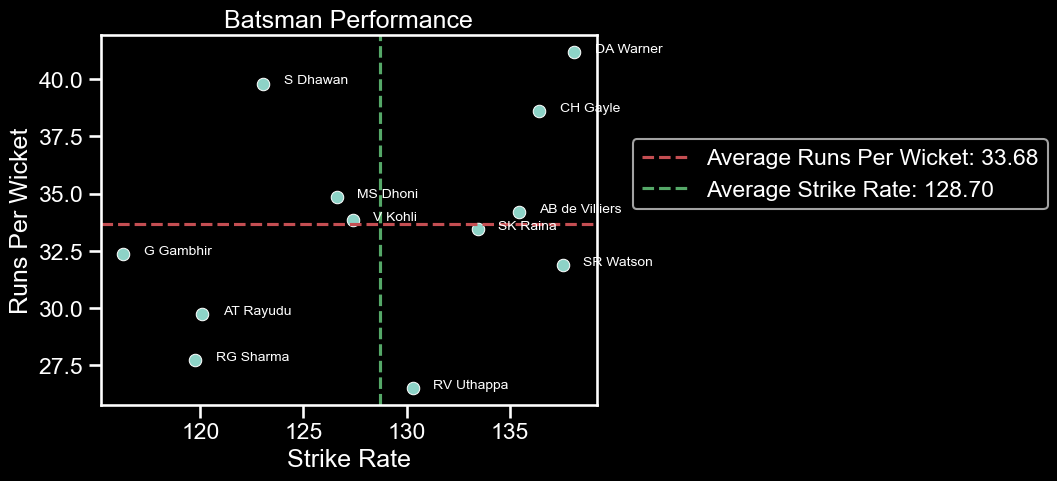

In [199]:
b1_filtered = batsman_stats1[batsman_stats1['Total Runs'] >= 2000]
# Creating a graph
sns.scatterplot(data=b1_filtered, x='Strike Rate', y='Runs scored per wicket')
# Calculate and plot the average 'Runs Per Wicket' line
rpw_avg = b1_filtered['Runs scored per wicket'].mean()
plt.axhline(y=rpw_avg, color='r', linestyle='--', label=f'Average Runs Per Wicket: {rpw_avg:.2f}')

# Calculate and plot the average 'Strike Rate' line
sr_avg = b1_filtered['Strike Rate'].mean()
plt.axvline(x=sr_avg, color='g', linestyle='--', label=f'Average Strike Rate: {sr_avg:.2f}')

# Set the axis labels, title, and legend
plt.xlabel('Strike Rate')
plt.ylabel('Runs Per Wicket')
plt.title('Batsman Performance')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))

# Add data labels for each point
for i in range(len(b1_filtered)):
    plt.text(b1_filtered.iloc[i]['Strike Rate'] + 1, b1_filtered.iloc[i]['Runs scored per wicket'], b1_filtered.index[i], fontsize=10, color='white')


# Show the plot
plt.show()

#### **FINAL RESULT**
**David Warner** is by far the best chaser with having the highest runs scored per wicket and the second highest strike rate.

#### **SUB-RESEARCH QUESTION 2:**
**Who is best Death Batsmen?**
> Let's make a dataframe than contains batsmen stats in the last 5 overs which are considered death overs.


In [200]:
#Proccesing the new dataframe
batsman_stats3 = pf1.get_death_stats(ball_by_ball)

#Filtering out for top batsmen
batsman_stats3 = batsman_stats3[batsman_stats3['Total Runs'] >= 1000]

#Creating variables helpful in analysis
batsman_stats3['Strike Rate'] = batsman_stats3['Total Runs'] / batsman_stats3['Balls Faced'] * 100
batsman_stats3['Runs scored per wicket']= batsman_stats3['Total Runs'] / batsman_stats3['Wickets'] 

#Sorting by value
batsman_stats3 = batsman_stats3.sort_values('Runs scored per wicket',ascending=False)

#Exporting the dataframe to processed data
export_path = '../data/processed/Ishaan/batsman_stats3.csv'
batsman_stats3.to_csv(export_path, index=True)
batsman_stats3.head(10)

,Matches,Total Runs,Balls Faced,Wickets,Strike Rate,Runs scored per wicket
batter,,,,,,
AB de Villiers,81,1868,867,40,215.455594,46.700000
MS Dhoni,162,3027,1814,98,166.868798,30.887755
DA Miller,69,1043,605,36,172.396694,28.972222
HH Pandya,76,1136,702,43,161.823362,26.418605
AD Russell,53,1055,572,40,184.440559,26.375000
YK Pathan,82,1126,732,45,153.825137,25.022222
V Kohli,78,1298,725,55,179.034483,23.600000
RG Sharma,86,1481,846,63,175.059102,23.507937
KA Pollard,128,2032,1270,87,160.000000,23.356322


In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

# Creating a graph
sns.scatterplot(data=batsman_stats3, x='Strike Rate', y='Runs scored per wicket')
# Calculate and plot the average 'Runs Per Wicket' line
rpw_avg = batsman_stats3['Runs scored per wicket'].mean()
plt.axhline(y=rpw_avg, color='r', linestyle='--', label=f'Average Runs Per Wicket: {rpw_avg:.2f}')

# Calculate and plot the average 'Strike Rate' line
sr_avg = batsman_stats3['Strike Rate'].mean()
plt.axvline(x=sr_avg, color='g', linestyle='--', label=f'Average Strike Rate: {sr_avg:.2f}')

# Set the axis labels, title, and legend
plt.xlabel('Strike Rate')
plt.ylabel('Runs Per Wicket')
plt.title('Batsman Performance')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.75))

#Add data labels for each point
for i in range(len(batsman_stats3)):
    plt.text(batsman_stats3.iloc[i]['Strike Rate'] -2, batsman_stats3.iloc[i]['Runs scored per wicket']+1.5, batsman_stats3.index[i], fontsize=12, color='white')

# Show the plot
plt.show()

#### **FINAL RESULT**
**AB De Villiers** is an anomaly.

### **MAIN RESEARCH QUESTION**

Now we need to make a weighted score formula that assesses the data appropriately

Weighted Score = (Total Runs - Balls Faced)/Wickets * (Matches)^(1/3) * (Total Runs)^(1/3)

We will have 3 types of Weigthed_Score (Overall, Playoffs and while Chasing), I believe Overall= 70%, Playoffs= 20%, Chasing= 10% should be appropriate way of assessing the Batsmen.


In [ ]:
#Overall
batsman_stats['Weighted Score'] = 0.7*pf1.calculate_batsman_score(batsman_stats) 
batsman_stats = batsman_stats.sort_values('Weighted Score', ascending=False)
batsman_stats.head(25)

In [ ]:
#While chasing
batsman_stats1['Weighted Score'] = 0.1*pf1.calculate_batsman_score(batsman_stats1)
pf1.calculate_batsman_score(batsman_stats1)
batsman_stats1 = batsman_stats1.sort_values('Weighted Score', ascending=False)
batsman_stats1.head(25)

In [ ]:
#Playoffs
batsman_stats2['Weighted Score'] = 0.2 *pf1.calculate_batsman_score(batsman_stats2)
batsman_stats2 = batsman_stats2.sort_values('Weighted Score', ascending=False)
batsman_stats2.head(25)

In [ ]:
#Merging all the dataframe to have one dataframe that combines weighted score of all three categories
merged_df = pd.merge(batsman_stats1, batsman_stats2, left_index=True, right_index=True).merge(batsman_stats, left_index=True, right_index=True)

#Sorting by value
merged_df = merged_df.sort_values('Weighted Score', ascending=False)

#Exporting the dataframe, weighted score is the only useful column
merged_df = merged_df[['Weighted Score']]
export_path = '../data/processed/Ishaan/merged_df.csv'
merged_df.to_csv(export_path, index=True)

#Plotting the results
ax = merged_df.plot.bar(figsize=(10, 8))
ax.set_xlabel('Batsmen', fontsize=12)
ax.set_ylabel('Weighted Score', fontsize=12)
ax.set_title('Weighted Score by Batsmen', fontsize=20)
ax.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()



## **FINAL RESULT**
#### **RESEARCH QUESTION** :Who are the top 4 Batsmen in the history of IPL ?
1. AB de Villiers
2. Chris Gayle
3. David Warner
4. KL Rahul